In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

In [201]:
file = r'C:\\Users\palux\Desktop\df s\gym_churn.csv'
df = pd.read_csv(file)

df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


1. gender – Пол клиента
2. Near_Location – Проживает ли клиент рядом с местом предоставления услуг (1 - да, 0 - нет).
3. Partner – Является ли клиент сотрудником компании-партнера.
4. Promo_friends – Зарегистрировался ли клиент через акцию "приведи друга" (1 - да, 0 - нет).
5. Phone – Есть ли у клиента указанный номер телефона (1 - да, 0 - нет).
6. Contract_period – Срок действия контракта (в месяцах).
7. Group_visits – Посещает ли клиент групповые занятия (1 - да, 0 - нет).
8. Age – Возраст клиента.
9. Avg_additional_charges_total – Средняя сумма дополнительных расходов клиента (покупки напитков, прокат оборудования).
10. Month_to_end_contract – Количество месяцев до окончания текущего контракта.
11. Lifetime – Длительность взаимодействия клиента с компанией (в месяцах).
12. Avg_class_frequency_total – Средняя частота посещений занятий клиентом за всё время.
13. Avg_class_frequency_current_month – Средняя частота посещений занятий клиентом за последний месяц.
14. Churn – Целевой столбец, указывающий, ушел ли клиент (1 - ушел, 0 - остался).

In [202]:
a = df.groupby(df['Churn']).count()
a

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939
1,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061,1061


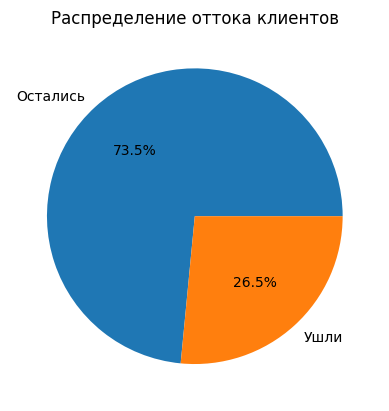

In [204]:
a['gender']
labels = ['Остались', 'Ушли']

plt.pie(a['gender'], labels=labels, autopct='%1.1f%%')
plt.title("Распределение оттока клиентов")
plt.show()

In [205]:
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [207]:
cat_columns = ['gender', 'Near_Location', 'Partner',
               'Promo_friends', 'Phone', 'Contract_period',
               'Group_visits', 'Age', 'Lifetime', 'Churn']

for col in cat_columns:
    df[col] = df[col].astype('category')

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   gender                             4000 non-null   category
 1   Near_Location                      4000 non-null   category
 2   Partner                            4000 non-null   category
 3   Promo_friends                      4000 non-null   category
 4   Phone                              4000 non-null   category
 5   Contract_period                    4000 non-null   category
 6   Group_visits                       4000 non-null   category
 7   Age                                4000 non-null   category
 8   Avg_additional_charges_total       4000 non-null   float64 
 9   Month_to_end_contract              4000 non-null   float64 
 10  Lifetime                           4000 non-null   category
 11  Avg_class_frequency_total          4000 non

<Axes: xlabel='Age', ylabel='count'>

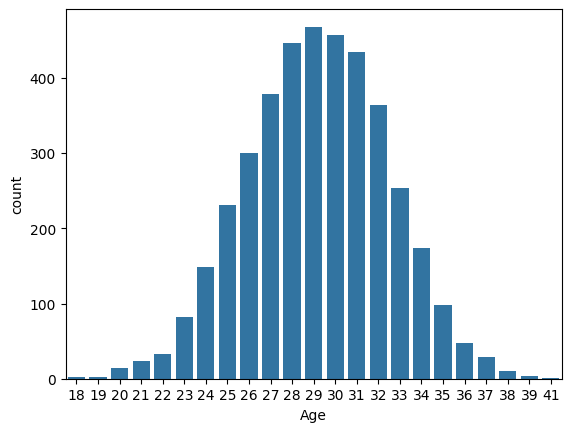

In [210]:
sns.countplot(data=df, x = 'Age')

In [211]:
gender_0 = df[df['gender']==0]
gender_1 = df[df['gender']==1]

In [212]:
stat, p = mannwhitneyu(gender_0, gender_1, alternative='two-sided')

In [215]:
columns_0 = gender_0.columns
columns_0 = columns_0.drop('gender')
results = []

for col in columns_0:
    stat, p = mannwhitneyu(gender_0[col], gender_1[col], alternative='two-sided')
    results.append([col,stat,p])

resudf_results = pd.DataFrame(results, columns=["Столбец", "Статистика", "p-value"])

resudf_results.sort_values(by='p-value',ascending=False)

,Столбец,Статистика,p-value
8,Month_to_end_contract,1998134.0,0.975350
12,Churn,1997910.0,0.964317
4,Contract_period,1996064.0,0.924923
7,Avg_additional_charges_total,2003594.0,0.903342
2,Promo_friends,2008456.5,0.750276
0,Near_Location,1989470.0,0.671842
9,Lifetime,1983255.5,0.660260
6,Age,1980412.0,0.606121
3,Phone,2009246.5,0.589089
11,Avg_class_frequency_current_month,1976967.0,0.543298


Ни одно значание не вышло за критическую область в 0.05, что можно интерпретировать как: пол (gender) не оказывает статистически значимого влияния ни на один из параметров. Значит нет оснований отвергать H0.

In [214]:
columns_0 = gender_0.columns
columns_0 = columns_0.drop('gender')
results = []

for col in columns_0:
    stat, p = shapiro(df[col])
    results.append([col,stat,p])
    
resudf_results = pd.DataFrame(results, columns=["Столбец", "Статистика", "p-value"])

resudf_results.sort_values(by='Статистика',ascending=False)

,Столбец,Статистика,p-value
6,Age,0.991515,1.018004e-14
10,Avg_class_frequency_total,0.991272,5.735722e-15
11,Avg_class_frequency_current_month,0.982500,7.539839e-22
7,Avg_additional_charges_total,0.963122,8.667115e-31
9,Lifetime,0.816842,1.607944e-55
8,Month_to_end_contract,0.740261,6.537167e-62
4,Contract_period,0.713690,9.324891e-64
1,Partner,0.636368,2.093873e-68
5,Group_visits,0.625331,5.342212e-69
2,Promo_friends,0.580961,3.047099e-71
